In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = pd.read_csv("tested.csv")  # Replace with actual path


In [ ]:
# Basic dataset overview
print(titanic_data.info())
print(titanic_data.describe())
print(titanic_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.48162

In [ ]:
# Check for missing values
print(titanic_data.isnull().sum())

# Handle missing values (example strategies)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)  # Fill missing Age with median
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode
titanic_data.drop(columns=['Cabin'], inplace=True)  # Drop Cabin (too many missing values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<ipython-input-27-1c81fe319edc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)  # Fill missing Age with median
<ipython-input-27-1c81fe319edc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

<ipython-input-28-b566c23f30fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette='pastel')


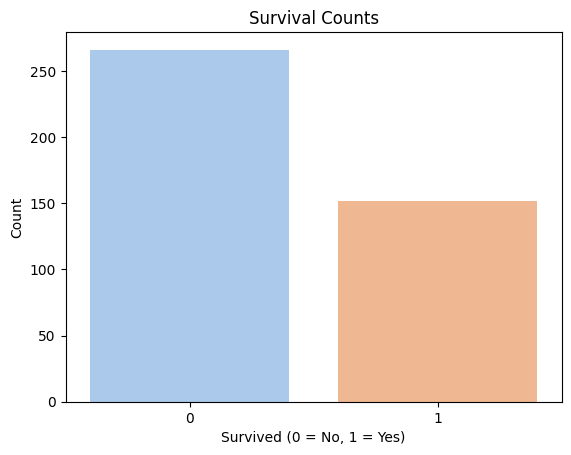

In [ ]:
# Survival rate
sns.countplot(x='Survived', data=titanic_data, palette='pastel')
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


<ipython-input-29-411a4c1de83a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic_data, palette='muted')


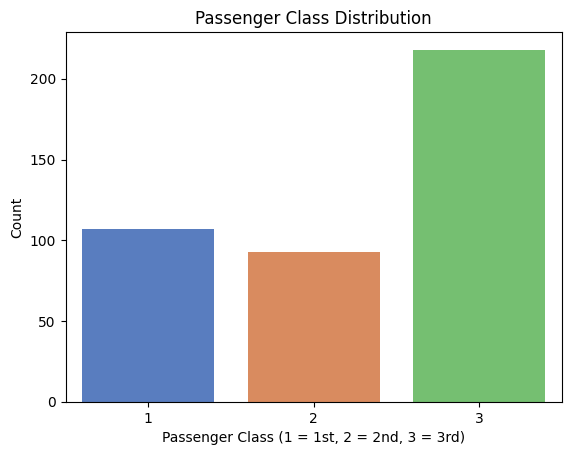

In [ ]:
sns.countplot(x='Pclass', data=titanic_data, palette='muted')
plt.title("Passenger Class Distribution")
plt.xlabel("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)")
plt.ylabel("Count")
plt.show()


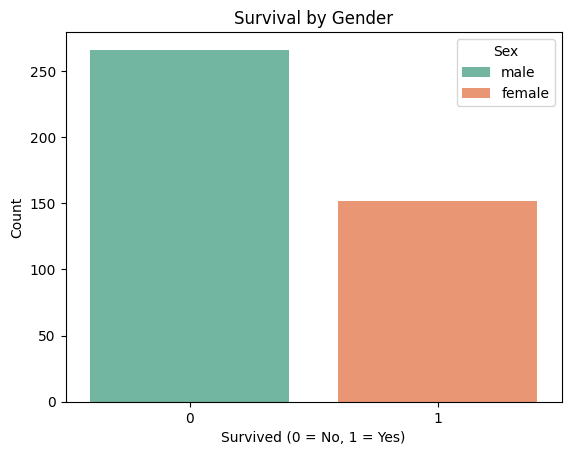

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data, palette='Set2')
plt.title("Survival by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


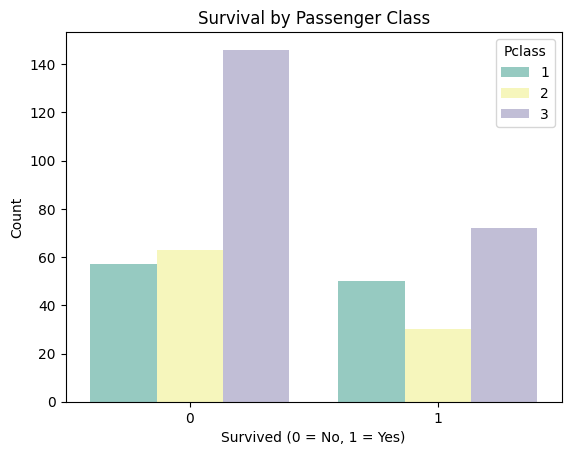

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data, palette='Set3')
plt.title("Survival by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


<ipython-input-32-e2ed8d6a5545>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=titanic_data, palette='coolwarm')


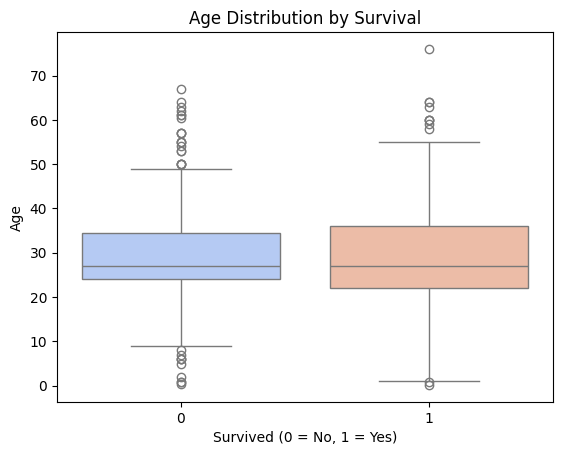

In [ ]:
sns.boxplot(x='Survived', y='Age', data=titanic_data, palette='coolwarm')
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

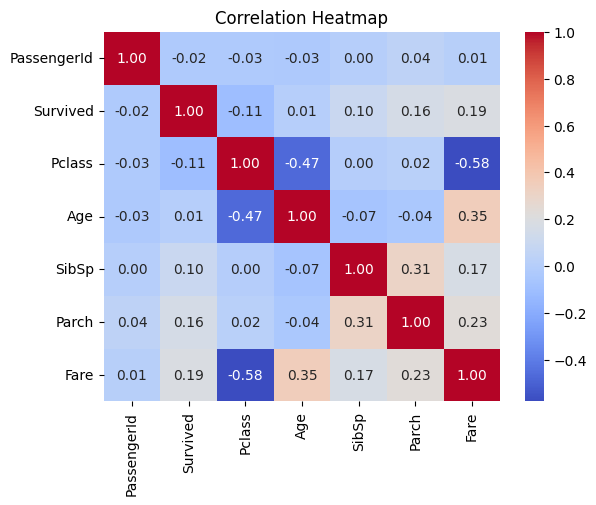

In [ ]:
numeric_columns = titanic_data.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = titanic_data[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


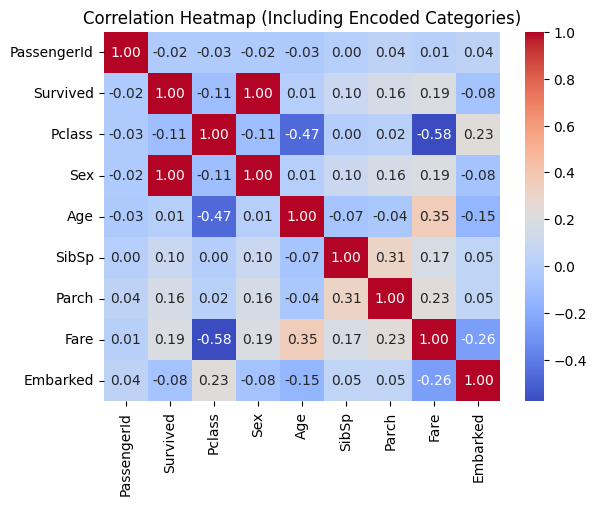

In [ ]:
# Convert categorical variables to numeric (if applicable)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Recalculate correlation matrix
numeric_columns = titanic_data.select_dtypes(include=['number']).columns
correlation_matrix = titanic_data[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Including Encoded Categories)")
plt.show()


In [ ]:
# Save the cleaned dataset
titanic_data.to_csv("cleaned_titanic_data.csv", index=False)
